# 1. PCA test

In [2]:
import numpy as np

In [3]:
M = np.array([[1,2], [2,4]])

In [4]:
np.linalg.matrix_rank(M, tol=None)

1

# 2. PCA usage

In [5]:
import pandas as pd

In [6]:
digits_train = pd.read_csv('d:/Data/Python2Kaggle/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('d:/Data/Python2Kaggle/optdigits/optdigits.tes', header=None)
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]

In [7]:
from sklearn.decomposition import PCA

In [8]:
estimator = PCA(n_components=2)

In [9]:
X_pca = estimator.fit_transform(X_digits)

In [10]:
from matplotlib import pyplot as plt

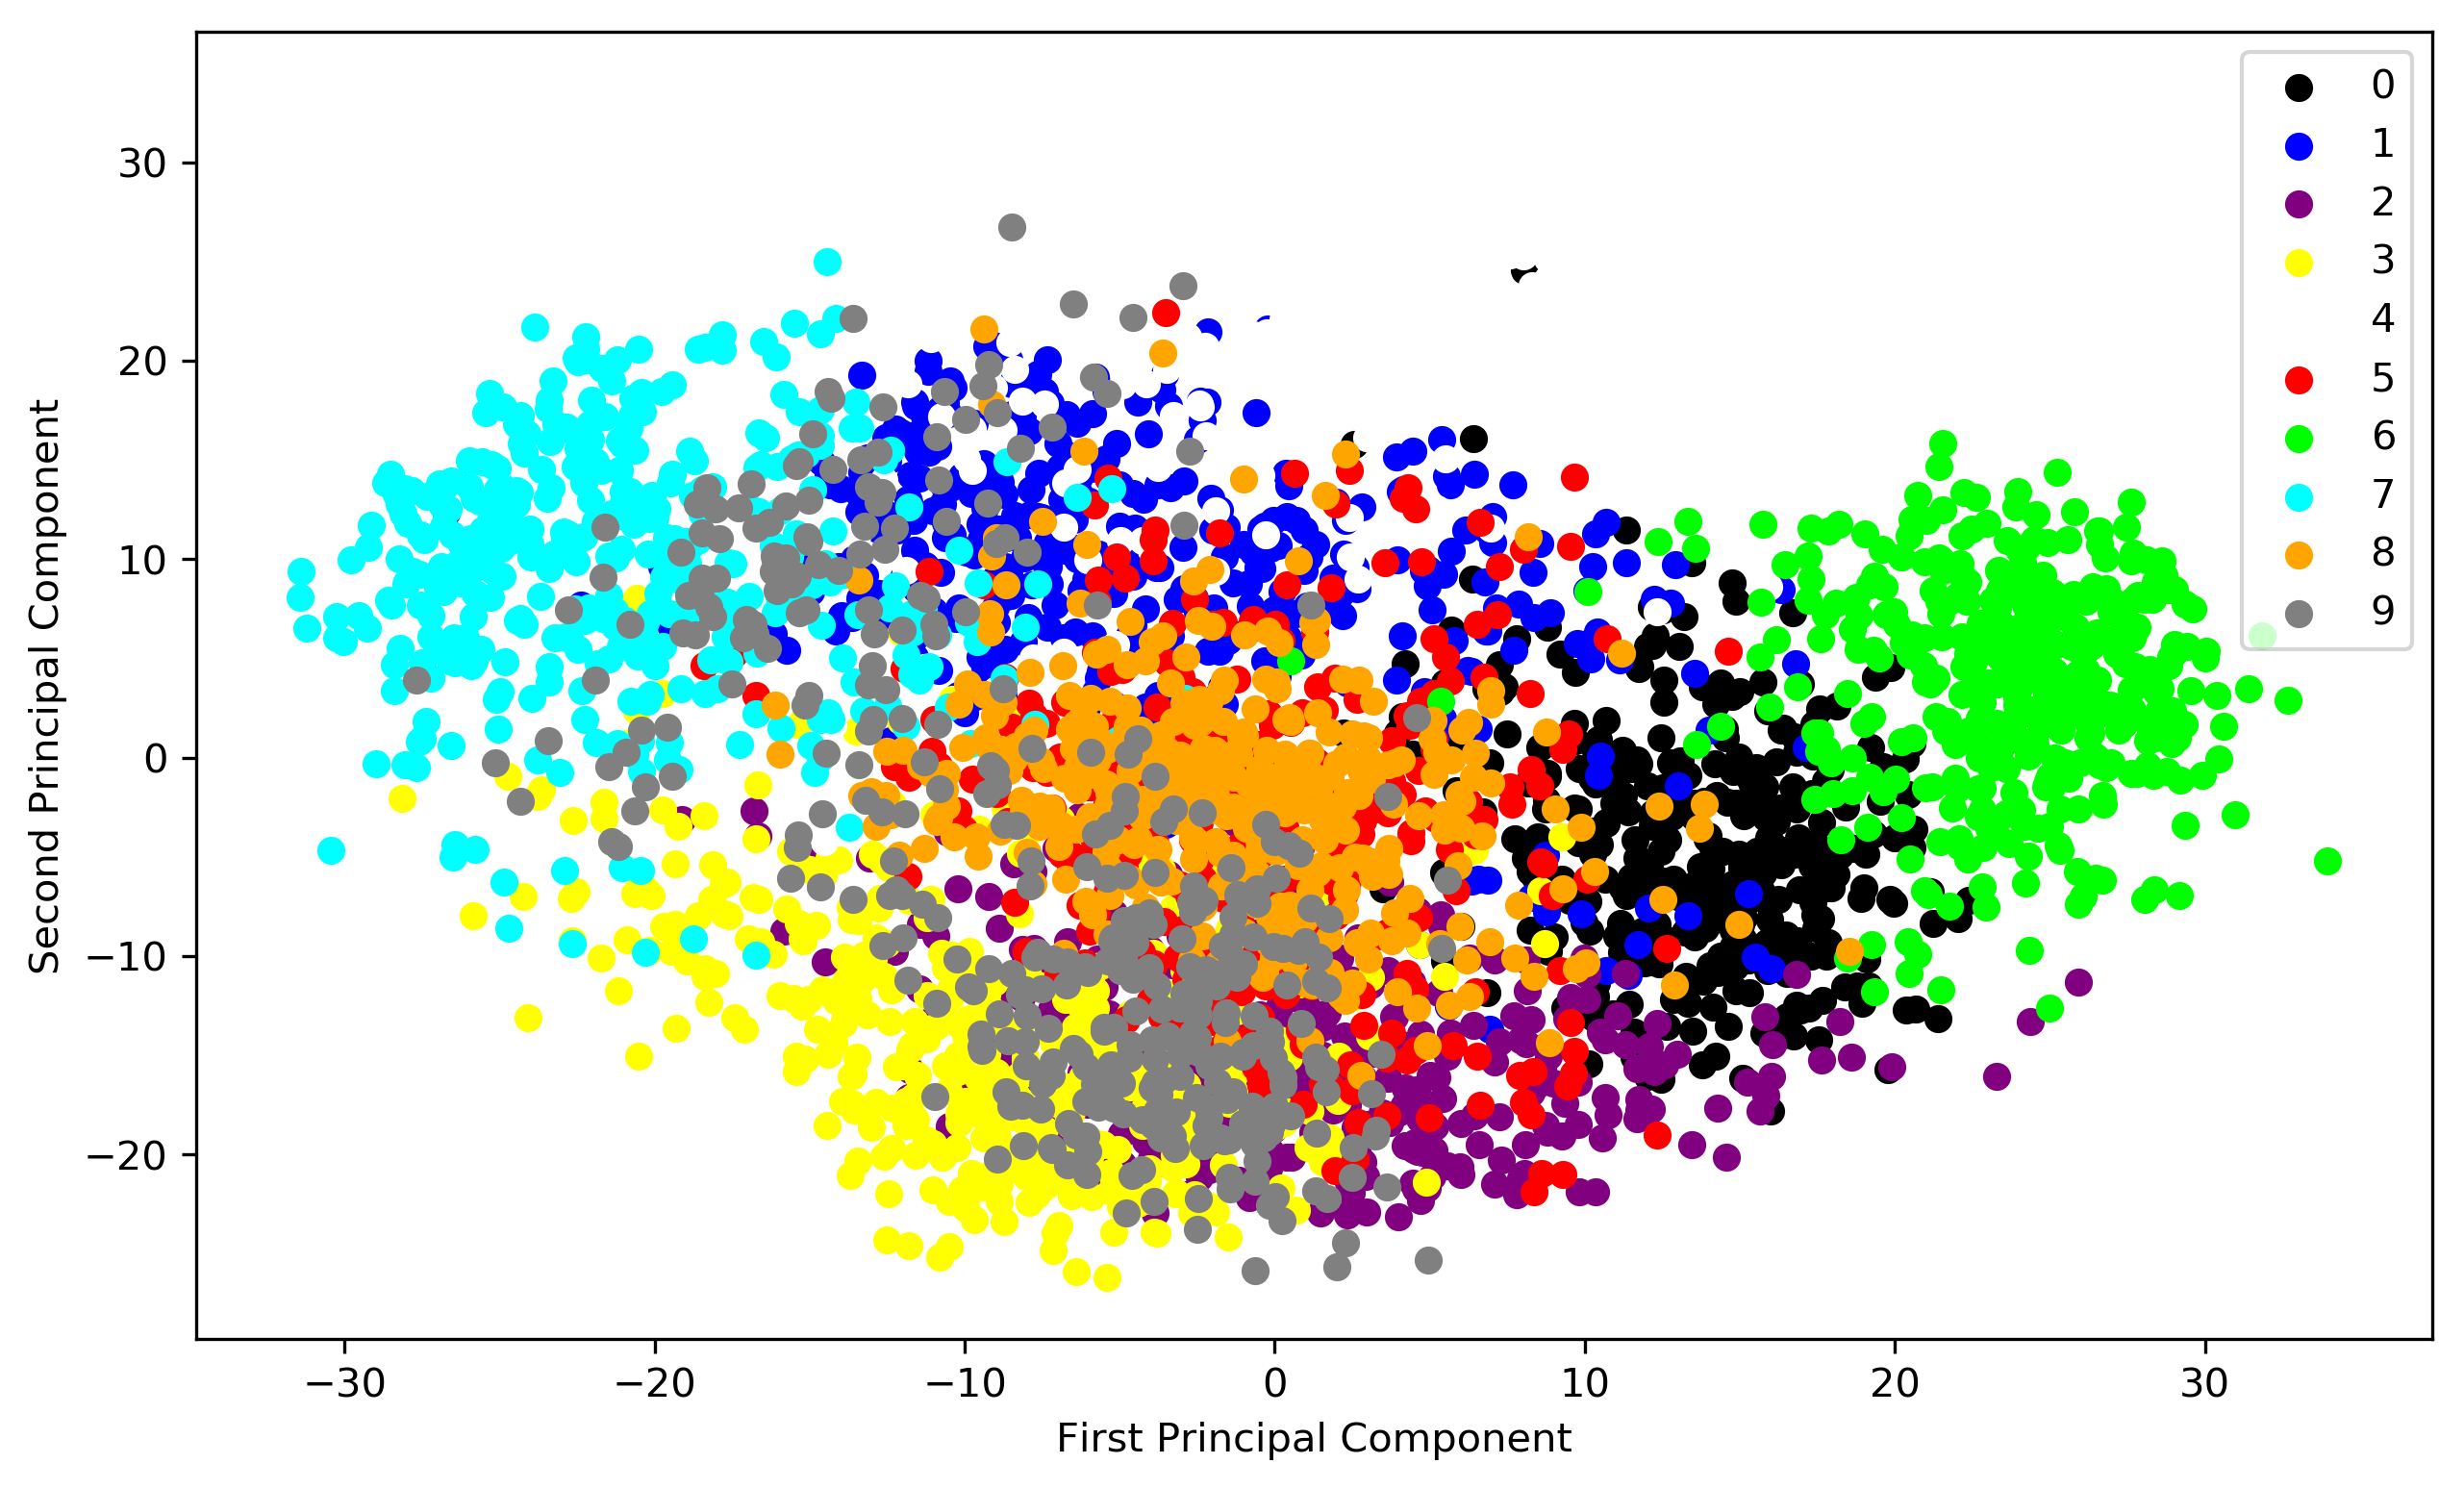

In [18]:
def plot_pca_scatter():
  colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
  for i in range(len(colors)):
    px = X_pca[:, 0][y_digits.as_matrix()==i]
    py = X_pca[:, 1][y_digits.as_matrix()==i]
    plt.scatter(px, py, c=colors[i])
  plt.legend(np.arange(0,10).astype(str))
  plt.xlabel('First Principal Component')
  plt.ylabel('Second Principal Component')
  plt.show()

plt.figure(figsize=(10,6), dpi=300, facecolor='w', edgecolor='r')
plot_pca_scatter()

# 3. Fits on original and low dimintional features after PCA

In [30]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [20]:
from sklearn.svm import LinearSVC

In [21]:
svc = LinearSVC()

In [29]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [33]:
y_pred = svc.predict(X_test)

In [34]:
estimator_20 = PCA(n_components=20)

In [35]:
pca_X_train = estimator_20.fit_transform(X_train)
pca_X_test = estimator_20.transform(X_test)

In [36]:
pca_svc = LinearSVC()

In [37]:
pca_svc.fit(pca_X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [38]:
pca_y_pred = pca_svc.predict(pca_X_test)

# 4. Comparison between 2 methods in 3

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(svc.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=np.arange(10).astype(str)))

0.9404563160823595
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       178
          1       0.94      0.91      0.92       182
          2       0.98      0.98      0.98       177
          3       0.96      0.93      0.94       183
          4       0.95      0.97      0.96       181
          5       0.90      0.97      0.93       182
          6       0.99      0.98      0.99       181
          7       0.98      0.92      0.95       179
          8       0.86      0.87      0.86       174
          9       0.86      0.90      0.88       180

avg / total       0.94      0.94      0.94      1797



In [44]:
print(pca_svc.score(pca_X_test, y_test))
print(classification_report(y_test, pca_y_pred, target_names=np.arange(10).astype(str)))

0.9232053422370617
             precision    recall  f1-score   support

          0       0.97      0.95      0.96       178
          1       0.88      0.89      0.89       182
          2       0.98      0.99      0.99       177
          3       0.97      0.90      0.93       183
          4       0.89      0.98      0.93       181
          5       0.81      0.98      0.89       182
          6       0.98      0.97      0.98       181
          7       0.97      0.91      0.94       179
          8       0.90      0.85      0.88       174
          9       0.91      0.82      0.86       180

avg / total       0.93      0.92      0.92      1797

